# Customer Behaviour Analysis & Churn Prediction

This notebook analyzes customer behavior to understand the factors contributing to customer churn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

## 1. Data Loading and Inspection

In [2]:
# Load the dataset
file_path = '02 Customer Churn-Dataset.xlsx'
try:
    df = pd.read_excel(file_path)
    print("Dataset loaded successfully.")
    print(f"Shape: {df.shape}")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully.
Shape: (7043, 23)


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Data Cleaning

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

Series([], dtype: int64)

Duplicate rows: 0


## 3. Exploratory Data Analysis (EDA)

In [6]:
# Identify the Target Variable
# Assuming 'Churn' or similar column exists. We will inspect columns first if unsure, 
# but for a churn dataset, it is usually 'Churn', 'Churn Label', or 'Exited'.

for col in df.columns:
    if 'churn' in col.lower() or 'status' in col.lower():
        target_col = col
        print(f"Identified target column: {target_col}")
        break
else:
    # Fallback/Manual identification might be needed if naming is obscure
    print("Could not automatically identify target column. Please check column names.")
    print(df.columns)

Identified target column: Churn


C:\Users\anant\AppData\Local\Temp\ipykernel_13600\1980667472.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='viridis')


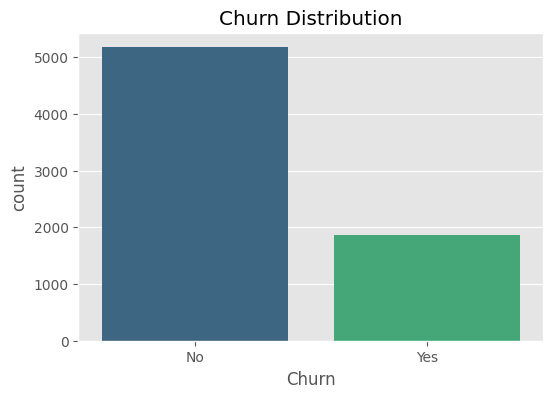

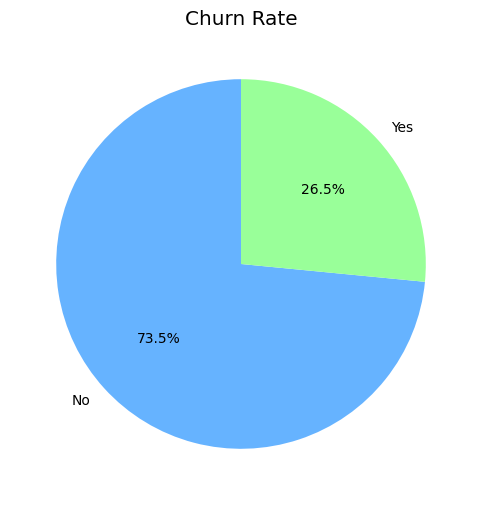

In [7]:
# Distribution of Churn
if 'target_col' in locals():
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target_col, data=df, palette='viridis')
    plt.title('Churn Distribution')
    plt.show()
    
    # Pie Circle
    plt.figure(figsize=(6, 6))
    df[target_col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
    plt.title('Churn Rate')
    plt.ylabel('')
    plt.show()

### Numerical Features Analysis

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'numAdminTickets', 'numTechTickets']


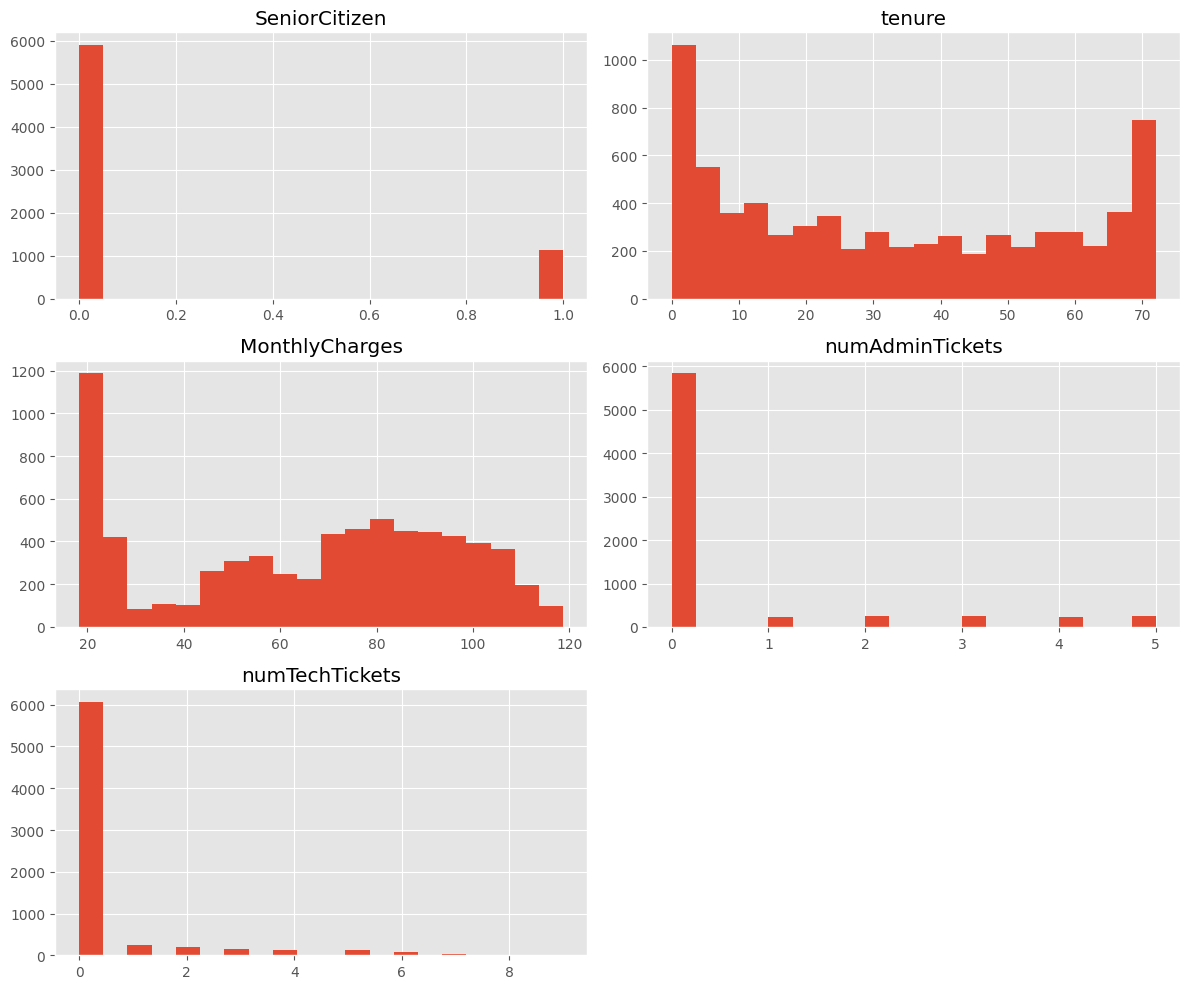

In [8]:
# Select numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", num_cols)

# Plot histograms
df[num_cols].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

### Categorical Features Analysis

Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


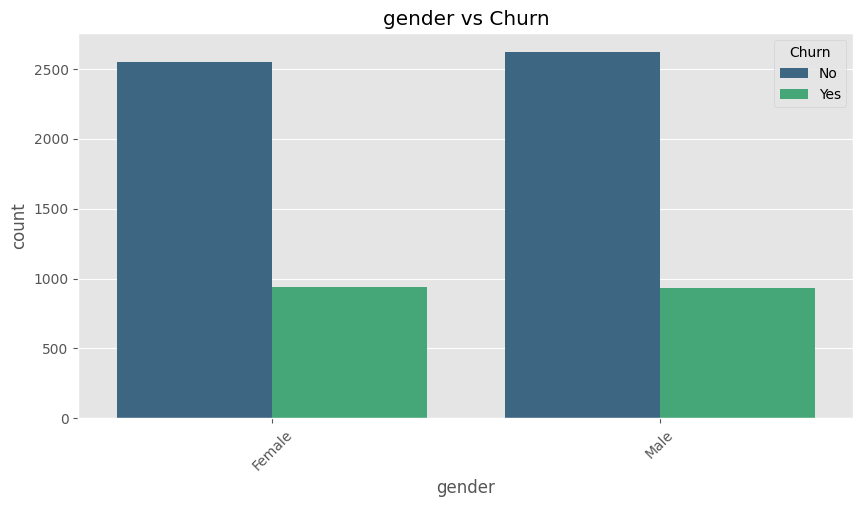

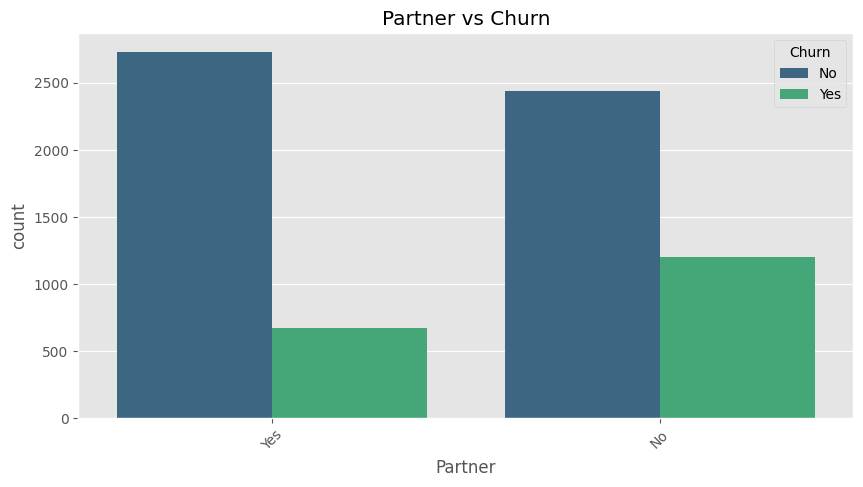

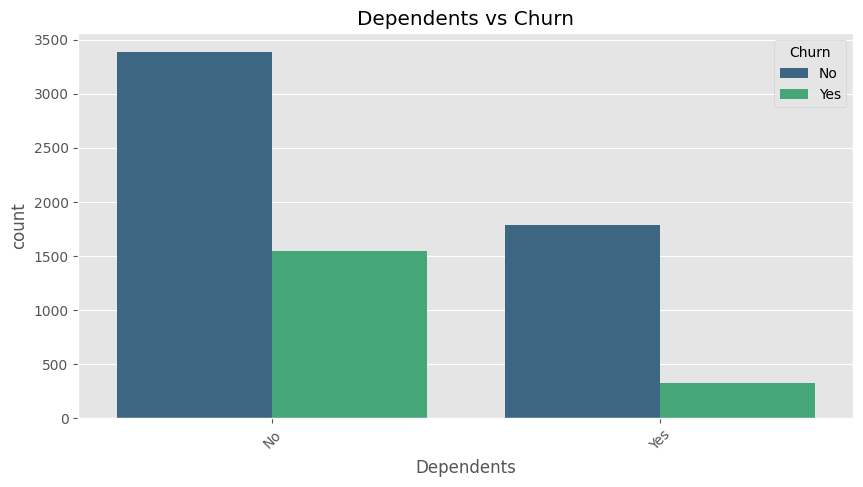

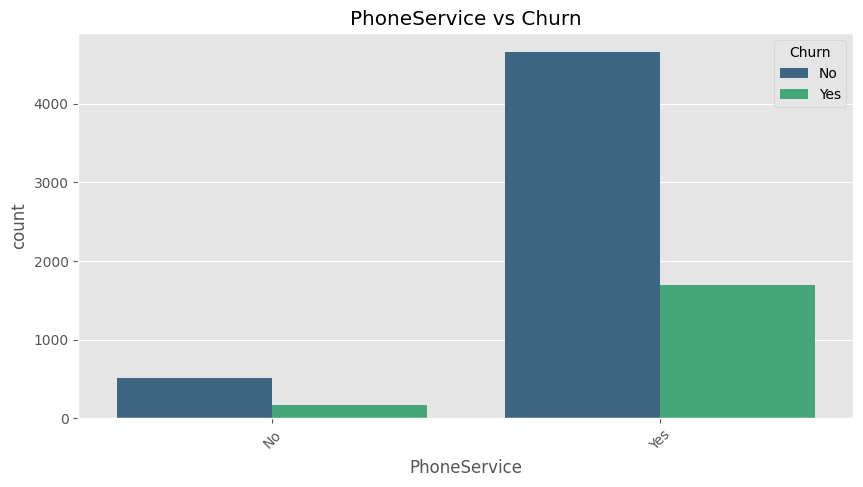

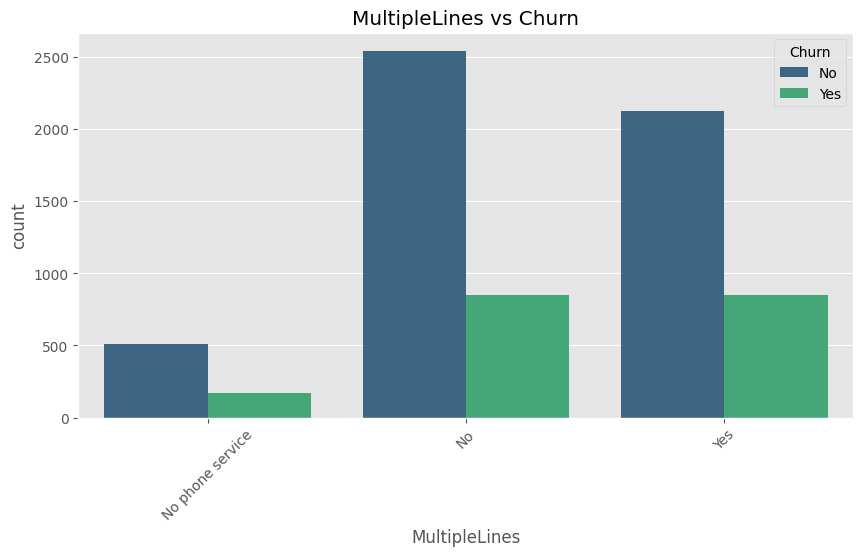

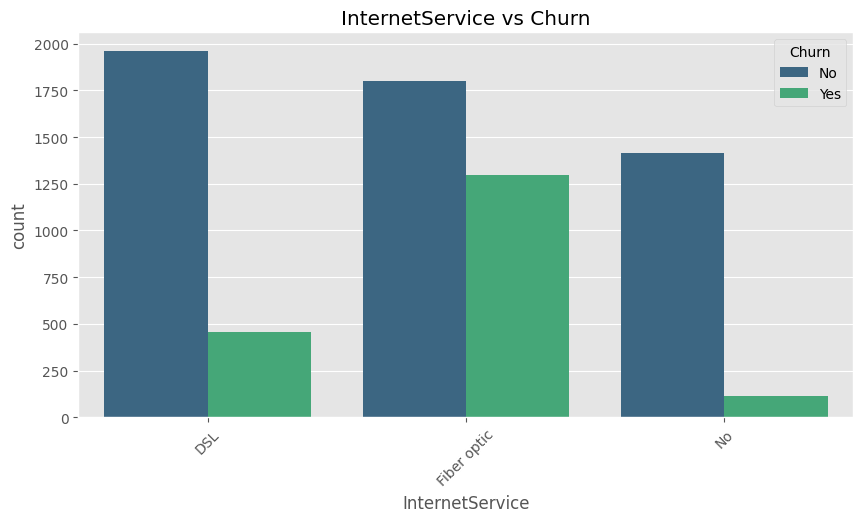

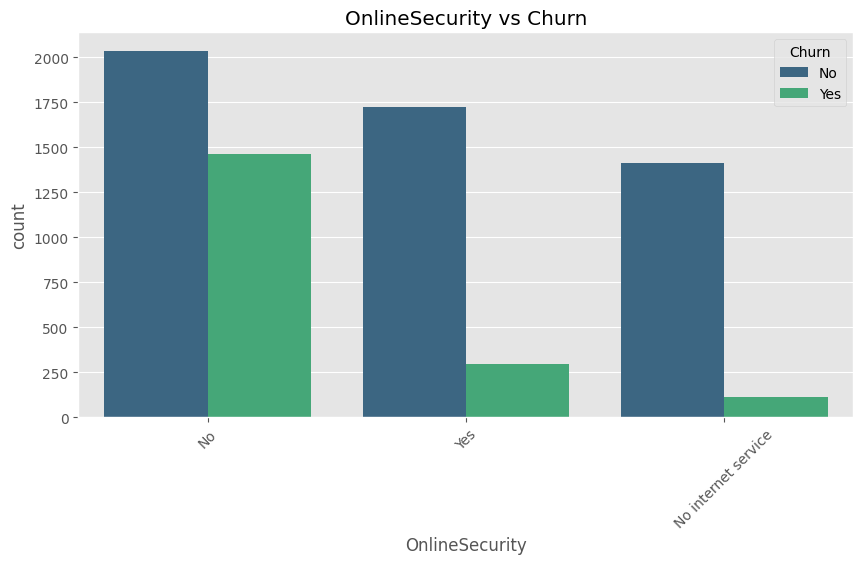

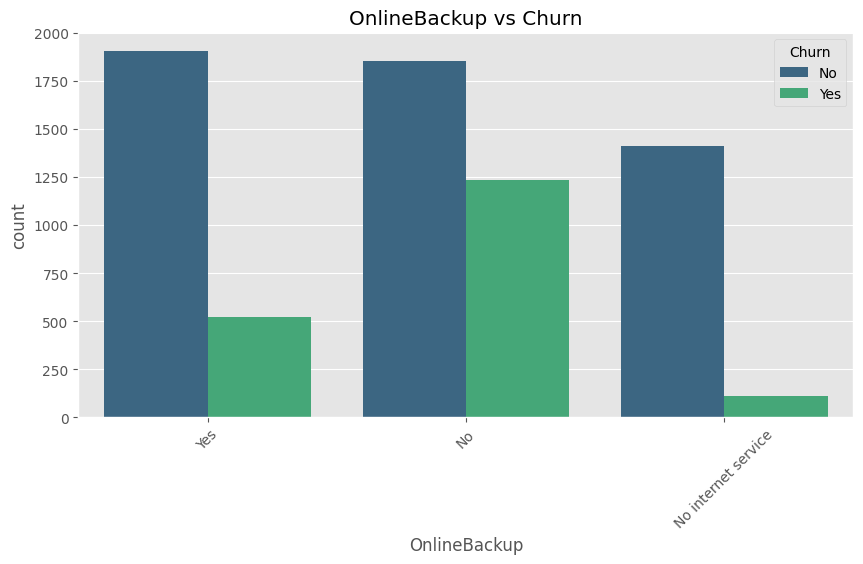

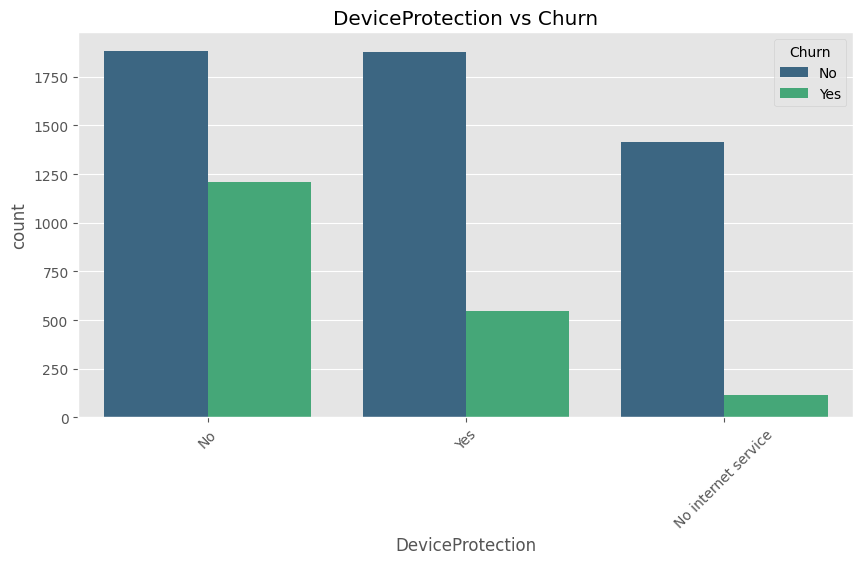

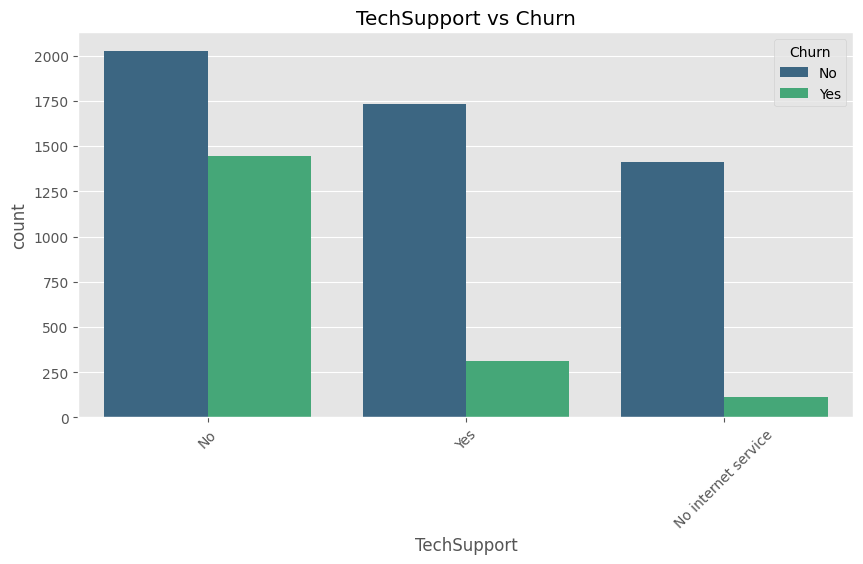

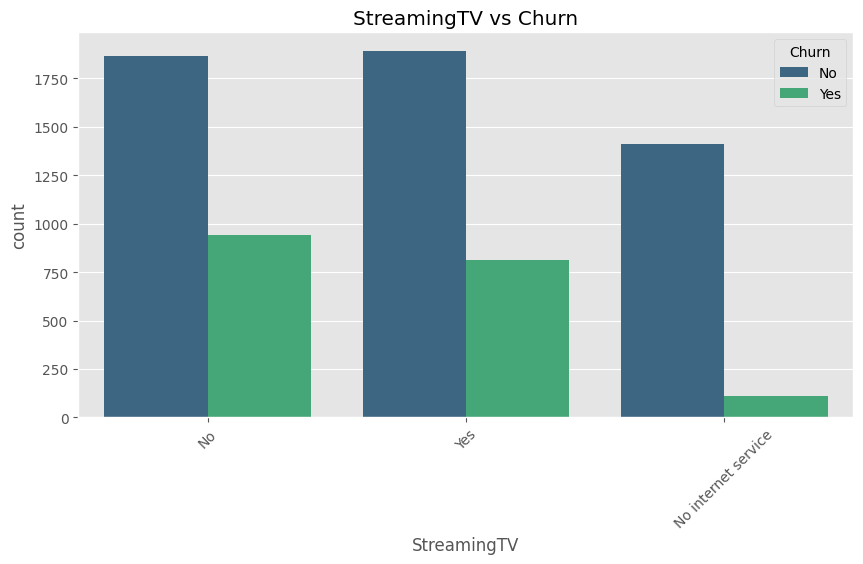

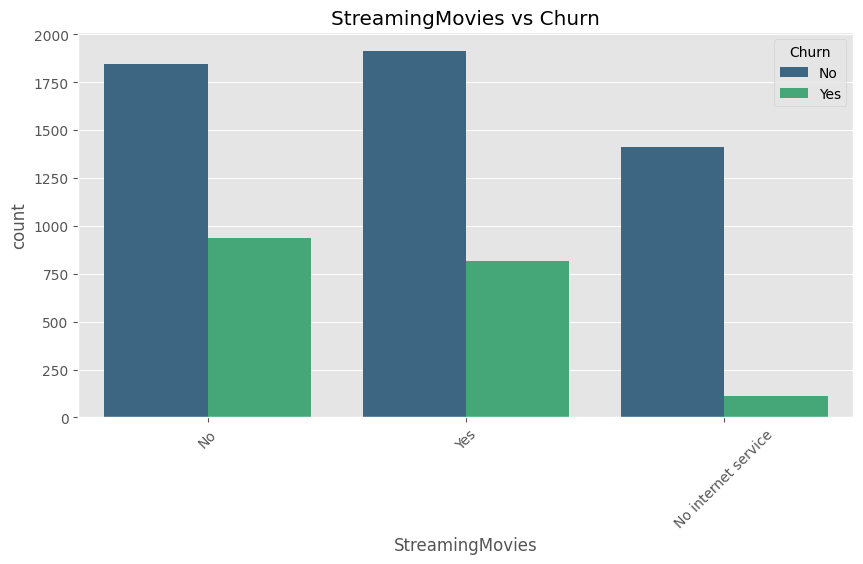

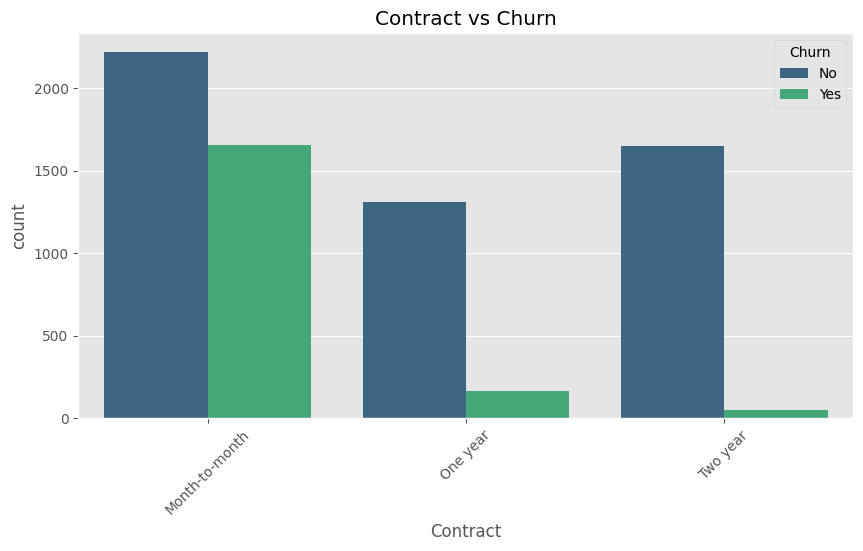

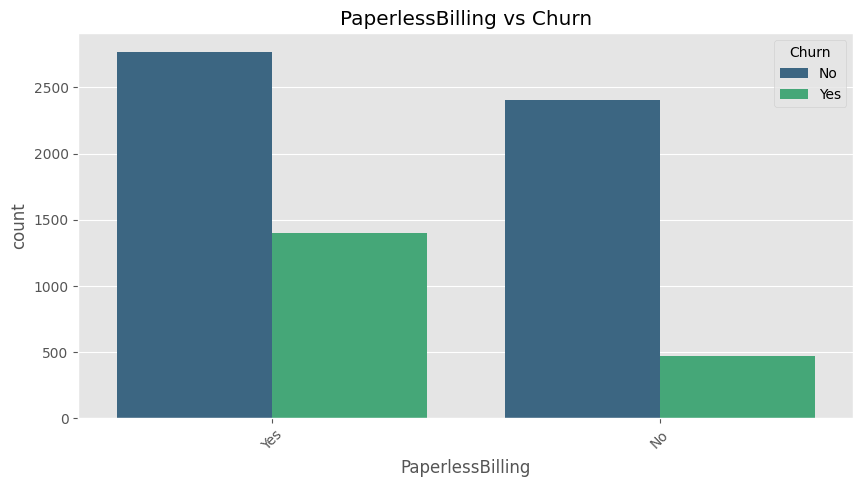

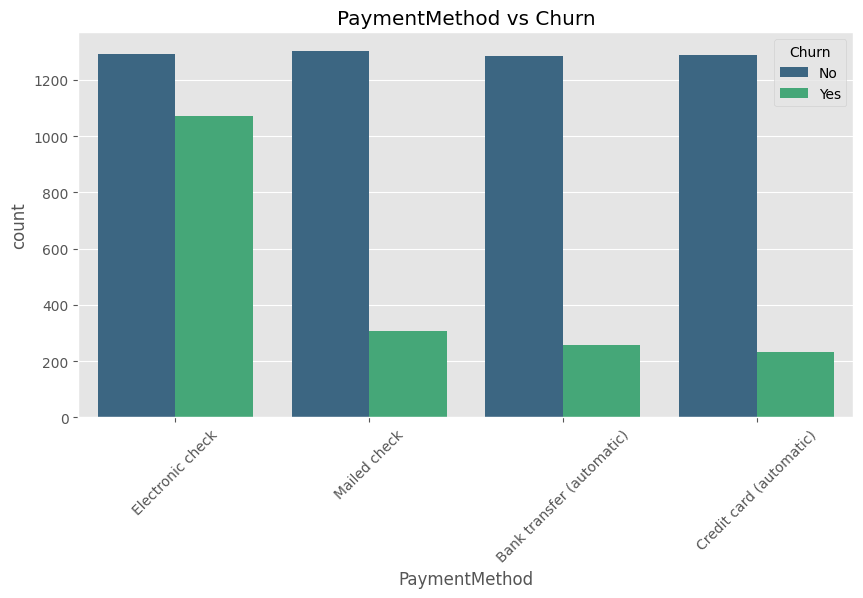

In [9]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Remove target column from this list if it's there
if 'target_col' in locals() and target_col in cat_cols:
    cat_cols.remove(target_col)

print("Categorical columns:", cat_cols)

# Plot churn vs categorical features
if 'target_col' in locals():
    for col in cat_cols:
        if df[col].nunique() < 20:  # Only plot if not too many unique values
            plt.figure(figsize=(10, 5))
            sns.countplot(x=col, hue=target_col, data=df, palette='viridis')
            plt.title(f'{col} vs {target_col}')
            plt.xticks(rotation=45)
            plt.show()